# Exploratory Data Analysis of House Prices

- Veri seti [kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)'dan alinmistir.

## ***Data Cleaning***
- Veri tipleri
- Eksik Degerler

### ***Veri tipleri***

- Veri tiplerini listele

In [215]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import math
warnings.filterwarnings('ignore')

# pandas varsayilan olarak cok sayida sutun veya satir varsa tumunu gostermez
# bu nedenle 100 sutun ve satir gostermesi icin
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# virgulden sonra belirli sayida basamak gosterimi icin 
pd.options.display.float_format = '{:,.3f}'.format

# font tanimlamalari
title_font = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 14}
axis_font  = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 14}

pd.options.display.float_format
# veri setini dataframe icerisine yukle
house_prices = pd.read_csv('train.csv')


print('\nHer bir degiskenin tipi:')
print('=======================================')
house_prices.info()


Her bir degiskenin tipi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nu

- Surekli ve Kategorik degiskenleri belirle.

In [216]:
# object tipinde olmayan sutunlar surekli degiskenler listesine ayir
quantitative = [column for column in house_prices.columns if house_prices.dtypes[column] != 'object']

# id degiskeni ile ilgilenmiyoruz
quantitative.remove('Id')

print('\nSurekli degiskenler : \n', quantitative)

print('\nSurekli degiskenlerin unique deger sayilari  :\n')
for column in quantitative:
    print(column + ' :' , house_prices[column].nunique())

# object tipinde olanlar kategorik degiskenler listesine ayir
qualitative = [column for column in house_prices.columns if house_prices.dtypes[column] == 'object']

print('\nKategorik degiskenler : \n', qualitative)
          
print('\KAtegorik degiskenlerin unique deger sayilari  :\n')
for column in qualitative:
    print(column + ' :', house_prices[column].nunique())


Surekli degiskenler : 
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Surekli degiskenlerin unique deger sayilari  :

MSSubClass : 15
LotFrontage : 110
LotArea : 1073
OverallQual : 10
OverallCond : 9
YearBuilt : 112
YearRemodAdd : 61
MasVnrArea : 327
BsmtFinSF1 : 637
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
TotRmsAbvGrd : 12
Fireplaces : 4
GarageYrBlt : 97
Gar

- Kategorik degiskenlerden surekli ozelligi gosteren yok (unique deger sayilari beklendigi gibi dusuk)

- Ancak surekli degiskenlerden unique deger sayisi 20 in altinda olanlari listeleyelim.

In [217]:
print('\nSurekli degiskenlerin unique deger sayisi 20 den az olanlar  :\n')
for column in quantitative:
    if house_prices[column].nunique() < 20:
        print(column + ' :' , house_prices[column].unique())


Surekli degiskenlerin unique deger sayisi 20 den az olanlar  :

MSSubClass : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual : [ 7  6  8  5  9  4 10  3  1  2]
OverallCond : [5 8 6 7 4 2 3 9 1]
BsmtFullBath : [1 0 2 3]
BsmtHalfBath : [0 1 2]
FullBath : [2 1 3 0]
HalfBath : [1 0 2]
BedroomAbvGr : [3 4 1 2 0 5 6 8]
KitchenAbvGr : [1 2 3 0]
TotRmsAbvGrd : [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces : [0 1 2 3]
GarageCars : [2 3 1 0 4]
PoolArea : [  0 512 648 576 555 480 519 738]
MoSold : [ 2  5  9 12 10  8 11  4  1  7  3  6]
YrSold : [2008 2007 2006 2009 2010]


### ***Eksik degerler***
- Eksik degerleri inceleme
    - Eksik degerleri donusturme
    - Eksik degerleri doldurma

#### ***Eksik degerleri inceleme***

In [218]:
print('\nHer bir degiskenin null deger oranlari  (%):')
print('=======================================')

# null degerleri isnull() metodu ile True/False olarak listeleyebilirim
# deger null oldugunda True doneceginden, isnull() metodundan donen nesneye 
# mean() metodunu uyguladigimizda null degerlerin ortlamasini verecektir.
house_prices.isnull().mean()*100


Her bir degiskenin null deger oranlari  (%):


Id               0.000
MSSubClass       0.000
MSZoning         0.000
LotFrontage     17.740
LotArea          0.000
Street           0.000
Alley           93.767
LotShape         0.000
LandContour      0.000
Utilities        0.000
LotConfig        0.000
LandSlope        0.000
Neighborhood     0.000
Condition1       0.000
Condition2       0.000
BldgType         0.000
HouseStyle       0.000
OverallQual      0.000
OverallCond      0.000
YearBuilt        0.000
YearRemodAdd     0.000
RoofStyle        0.000
RoofMatl         0.000
Exterior1st      0.000
Exterior2nd      0.000
MasVnrType       0.548
MasVnrArea       0.548
ExterQual        0.000
ExterCond        0.000
Foundation       0.000
BsmtQual         2.534
BsmtCond         2.534
BsmtExposure     2.603
BsmtFinType1     2.534
BsmtFinSF1       0.000
BsmtFinType2     2.603
BsmtFinSF2       0.000
BsmtUnfSF        0.000
TotalBsmtSF      0.000
Heating          0.000
HeatingQC        0.000
CentralAir       0.000
Electrical       0.068
1stFlrSF   

- Yalnizca bir sutundan NA degere sahip satirlari cikarma

In [219]:
# denemek icin
# house_prices.dropna(subset=['Electrical'])

- Eksik degerlerin doldurmak icin uygun oldugu (eksik deger orani sifirdan buyuk %40 den kucuk) ve olmadigi (yaridan fazla eksik deger bulunan) degiskenler

In [220]:
# if column null value mean is higher than %40 it is not suitable for filling
not_fit_to_fill = [column for column in house_prices.columns if house_prices[column].isnull().mean() > 0.4]

# if column null value mean is lower than %40 it is suitable for filling
fit_to_fill = [column for column in house_prices.columns if (house_prices[column].isnull().mean() < 0.4 and house_prices[column].isnull().mean() != 0)]

print('\nEksik degeri olan ve orani % 40 den az olan  degiskenler \n ', fit_to_fill)
print('\nEksik deger orani % 40 den fazla olan degiskenler \n ', not_fit_to_fill)



Eksik degeri olan ve orani % 40 den az olan  degiskenler 
  ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

Eksik deger orani % 40 den fazla olan degiskenler 
  ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


- Eksik degerlerin sutun ve satirlar bazinda gorsellestirilmesinde 4 sutunun neredeyse bos oldugu goruluyor.

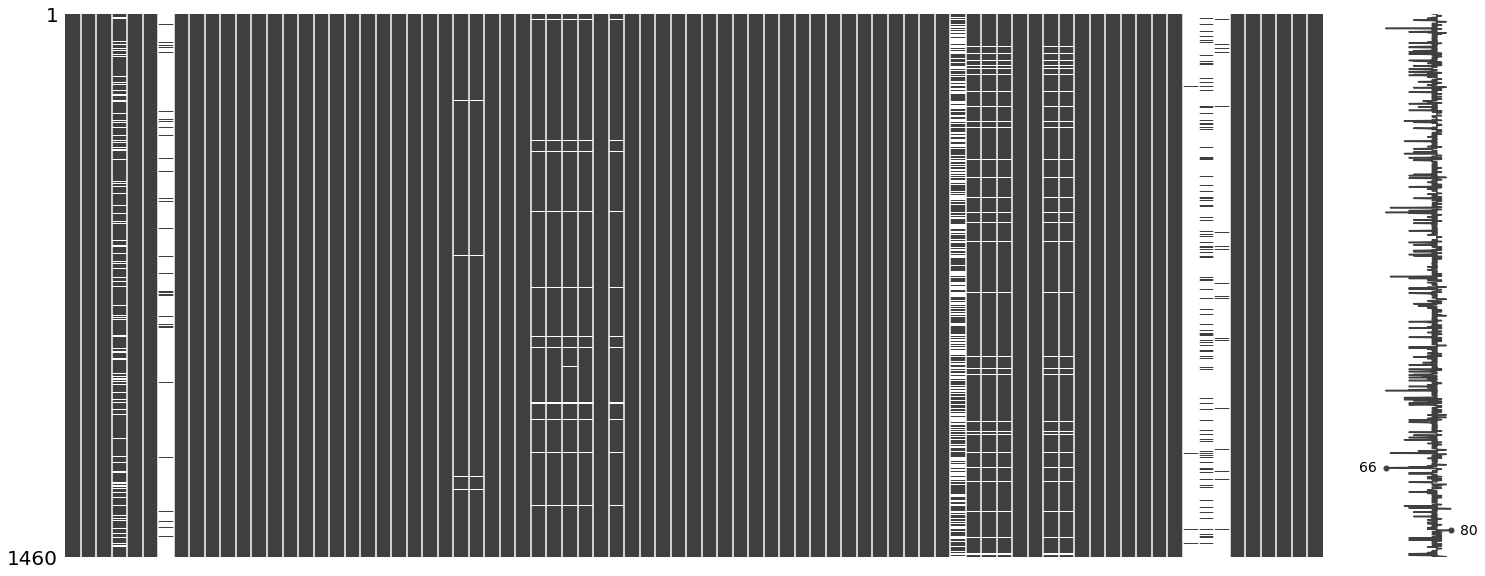

In [221]:
# missingno eksik sutunlari gorsellestirmeye yarar
missingno.matrix(house_prices)
plt.show()

- Eksik degerlerin bar grafigi

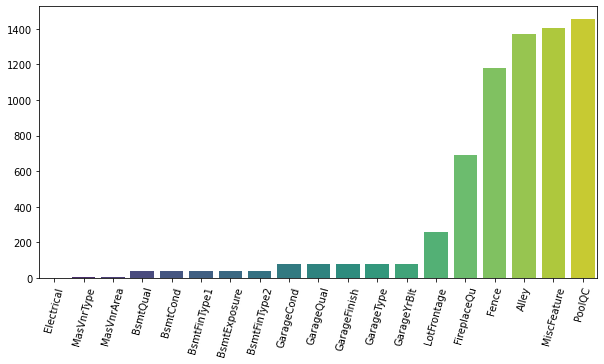

In [222]:
# null degerlerin toplamlarindan olusan seri
missing = house_prices.isnull().sum()

# where eksik degeri sifirdan buyukler icin null doner 
# dropna() ise bu null degerleri atar
missing = missing.where(lambda x : x>0).dropna()
# yukaridaki islemin kisa versiyonu  
# missing = missing[missing > 0]

# degerlere gore sirala
missing.sort_values(inplace=True)

# eksik degerler grafigi
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.xticks(rotation=75)
plt.show()

- Cok fazla eksik deger olan sutunlarda unique degerleri inceleyelim.

In [223]:
for column in not_fit_to_fill:
    print(column + ' :', house_prices[column].unique())

Alley : [nan 'Grvl' 'Pave']
FireplaceQu : [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
PoolQC : [nan 'Ex' 'Fa' 'Gd']
Fence : [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature : [nan 'Shed' 'Gar2' 'Othr' 'TenC']


- Bu degiskenlerin data description verisini inceledigimizde one-hot ya da integer encoding yapabilecegimiz degiskenler gorulebilir:
    - Alley : Type of alley access to property 
        - Grvl: Gravel, 
        - Pave: Paved, 
        - NA: No alley access
    - PoolQC: Pool quality
        - Ex: Excellent        
        - Gd: Good       
        - TA: Average/Typical       
        - Fa: Fair       
        - NA: No Pool
    - Fence: Fence quality       
        - GdPrv: Good Privacy       
        - MnPrv: Minimum Privacy
        - GdWo: Good Wood
        - MnWw: Minimum Wood/Wire 
        - NA: No Fence
    - MiscFeature: Miscellaneous feature not covered in other categories 
        - Elev: Elevator        
        - Gar2: 2nd Garage (if not described in garage section)
        - Othr: Other 
        - Shed: Shed (over 100 SF)
        - TenC: Tennis Court
        - NA: None
    - FireplaceQu: Fireplace quality
        - Ex: Excellent - Exceptional Masonry Fireplace
        - Gd: Good - Masonry Fireplace in main level 
        - TA: Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement 
        - Fa: Fair - Prefabricated Fireplace in basement
        - Po: Poor - Ben Franklin Stove 
        - NA: No Fireplace

- PoolQC ve FireplaceQu degiskenleri, ordinal (siralama) oldugundan integer encoding uygulariz.
- Alley, Fence, MiscFeature degiskenleri ise nominal degiskenler oldugundan one hot encoding uygulariz.

#### ***Eksik degerleri donusturme***
- One hot encoding: nominal degiskenlere uygulanabilir
- Integer encoding: ordinal (siralama) degiskenlere uygulanabilir

In [224]:
#  encode edecegimiz house_prices i ayri tutalim
house_prices_encoded = house_prices.copy()

# eksik degerlerion fazla oldugu degiskenlerden nominal ve ordinal olmak uzere iki liste olusturduk
ordinals = ['PoolQC', 'FireplaceQu']
nominals = ['Alley','Fence','MiscFeature']

# nominal degiskenleri one hot encoding uygula ve dataframe ile birlestir 
for column in nominals:
    house_prices_encoded = pd.concat([house_prices_encoded, 
                                      pd.get_dummies(house_prices_encoded[column], 
                                                     prefix=column)], axis=1)

# nominal degiskenleri artik df den cikarabiliriz
#house_prices_encoded = house_prices_encoded.drop(nominals, axis=1)
# kategorik degiskenlerden de cikarabiliriz
#for i in nominals:
#    qualitative.remove(i)

# integer encoding icin mapping yapan bir sozluk olusturuldu
# None degerlere de sifir atandi
encode_nums = {"PoolQC":     {"Ex": 3, "Gd": 2, "Fa": 1, None: 0},
                "FireplaceQu": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, None: 0}}

# pandas in replace metodu sozluk kullanarak mapping yapabiliyor ve 
# verileri sozluge gore degistriebiliyor
house_prices_encoded.replace(encode_nums, inplace=True)
house_prices_encoded

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_Pave,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,Attchd,"2,003.000",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,NaN,NaN,0,2,2008,WD,Normal,208500,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,3,Attchd,"1,976.000",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,3,Attchd,"2,001.000",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,NaN,NaN,0,9,2008,WD,Normal,223500,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,4,Detchd,"1,998.000",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,Attchd,"2,000.000",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,NaN,NaN,0,12,2008,WD,Normal,250000,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.000,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,3,Attchd,"1,999.000",RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,NaN,NaN,0,8,2007,WD,Normal,175000,0,0,0,0,0,0,0,0,0,0
1456,1457,20,RL,85.000,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.000,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,3,Attchd,"1,978.000",Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,MnPrv,NaN,0,2,2010,WD,Normal,210000,0,0,0,0,1,0,0,0,0,0
1457,1458,70,RL,66.000,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.000,Ex,Gd,Stone,TA,Gd,N

- Simdi de eksik degerleri az olan degiskenleri inceleyelim.

In [225]:
# unique degerleri inceleyelim
for column in fit_to_fill:
    print(column + ' :', house_prices_encoded[column].unique())

LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
MasVnrType : ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
MasVnrArea : [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 

#### ***Eksik degerleri doldurma***

- ***sifir degeri ile doldurulabilecek degiskenler***
    - LotFrontage
    - MasVnrArea

In [226]:
for column in ['LotFrontage', 'MasVnrArea']:
    house_prices_encoded[column].fillna(0, inplace=True)

- ***'None' string ifadesi ile doldurulacak degiskenler***
    - MasVnrType (duvarda kullanilan malzeme tipi): 'BrkFace' 'None' 'Stone' 'BrkCmn' nan 
        - Degiskende zaten 'None' ifadesi de kullanilmis.
    - BsmtQual: 'Gd' 'TA' 'Ex' nan 'Fa'
    - BsmtCond: 'TA' 'Gd' nan 'Fa' 'Po'
    - BsmtExposure: 'No' 'Gd' 'Mn' 'Av' nan
    - BsmtFinType1: 'GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ'
    - BsmtFinType2: 'GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ'
    - GarageType : 'Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types'
    - GarageFinish : 'RFn' 'Unf' 'Fin' nan
    - GarageQual : 'TA' 'Fa' 'Gd' nan 'Ex' 'Po'
    - GarageCond : 'TA' 'Fa' nan 'Gd' 'Po' 'Ex'

In [227]:
columns = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
           'BsmtFinType1', 'BsmtFinType2', 'GarageType', 
           'GarageFinish', 'GarageQual', 'GarageCond' ]
for column in columns:
    house_prices_encoded[column].fillna('None', inplace=True)

- ***o sutunda en cok bulunan deger (mod) ile doldurulacak degiskenler***
    - GarageYrBlt icin en cok bulunan deger 2005
    - Electrical: 'SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan , en cok bulunan deger 'SBrkr'

In [228]:
for column in ['GarageYrBlt','Electrical']:
    # GarageYrBlt ve Electrical en sik gecen mod degeri ile dolduruldu
    house_prices_encoded[column].fillna(house_prices_encoded[column].mode()[0], inplace=True)

In [229]:
house_prices_encoded.isnull().mean()*100

Id                  0.000
MSSubClass          0.000
MSZoning            0.000
LotFrontage         0.000
LotArea             0.000
Street              0.000
Alley              93.767
LotShape            0.000
LandContour         0.000
Utilities           0.000
LotConfig           0.000
LandSlope           0.000
Neighborhood        0.000
Condition1          0.000
Condition2          0.000
BldgType            0.000
HouseStyle          0.000
OverallQual         0.000
OverallCond         0.000
YearBuilt           0.000
YearRemodAdd        0.000
RoofStyle           0.000
RoofMatl            0.000
Exterior1st         0.000
Exterior2nd         0.000
MasVnrType          0.000
MasVnrArea          0.000
ExterQual           0.000
ExterCond           0.000
Foundation          0.000
BsmtQual            0.000
BsmtCond            0.000
BsmtExposure        0.000
BsmtFinType1        0.000
BsmtFinSF1          0.000
BsmtFinType2        0.000
BsmtFinSF2          0.000
BsmtUnfSF           0.000
TotalBsmtSF 

Eksik degerler dolduruldu sira geldi aykiri degerlere.

## ***Outlier Detection***

- Gorsellestirme
- z score
- IQR score (Tukey yontemi)

***Gorsellestirme yontemi***
- Boxplot grafigi ile degiskenler gozlemlenir
    - Burada sureklilik ozelligi gosteren degiskenleri inceledik

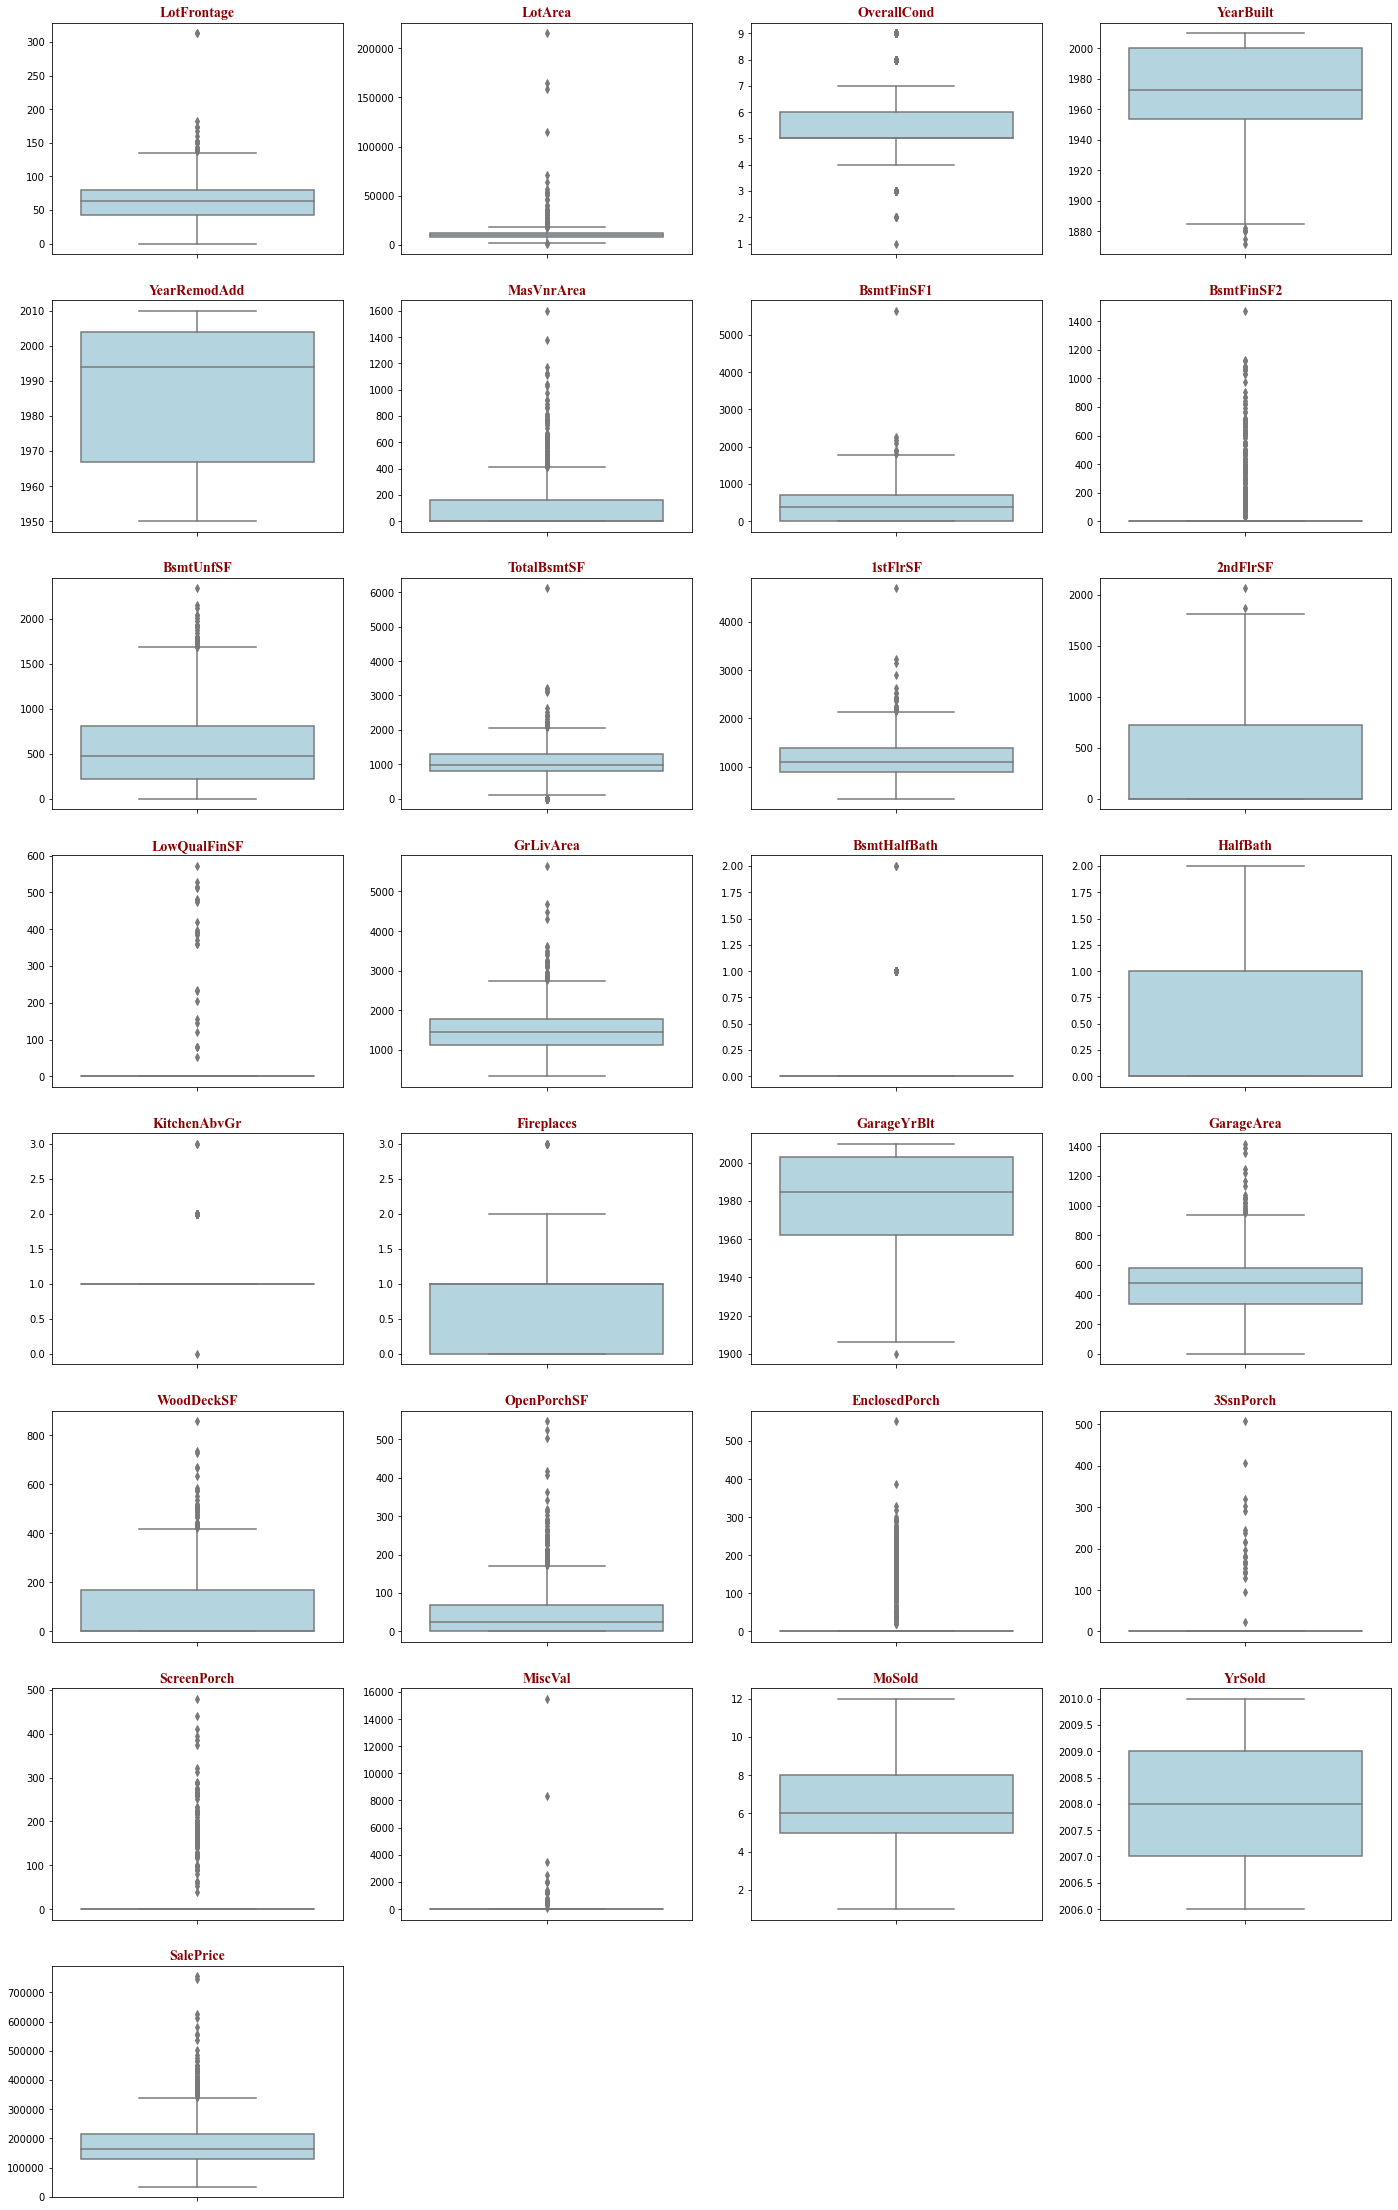

In [230]:
# eksik degerlerin dolduruldugu verileri clean df ine atalim
house_prices_clean = house_prices_encoded.copy()

# surekli mi kategorik mi karar veremedigimiz degiskenler bu listede
uncertain = []

# unique deger sayisi 20 nin altinda olan satis ayi ve yili degiskeni olmayanlari ayiralim
for column in quantitative:
    if house_prices_encoded[column].nunique() < 20 and (column != 'MoSold' and column !='YrSold'):
        quantitative.remove(column)
        uncertain.append(column)

# her satir icin cizilecek grafik
column_n = 4
# satir sayisini hesaplama
row_n = np.ceil(len(quantitative)/column_n)
# satir ve sutun sayisindan grafik boyutu hesabi
plt.figure(figsize=(6 * column_n, 5 * row_n ))


for i, column in enumerate(quantitative):
    plt.subplot(row_n,column_n,i+1)
    ax = sns.boxplot(y=house_prices_clean[column], color='lightblue')
    ax.set(ylabel='')
    plt.title(column, fontdict=title_font)

plt.show()


## ***Tek Degiskenli Analiz***

- Veri hakkinda genel bilgiler
- Dagilimlarin incelenmesi

- ***Veri hakkinda genel bilgiler***

In [231]:
print('\nDataframe genel yapisi: \n')
display(house_prices_clean.head())
print('\nDegiskenerin veri tipleri: \n')
print(house_prices_clean.info())
print('\nTanimlayici istatistikler (Eksik degerler doldurulduktan sonra) :\n')
display(house_prices_clean.describe())


Dataframe genel yapisi: 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_Pave,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,Attchd,"2,003.000",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,NaN,NaN,0,2,2008,WD,Normal,208500,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,3,Attchd,"1,976.000",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,3,Attchd,"2,001.000",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,NaN,NaN,0,9,2008,WD,Normal,223500,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,4,Detchd,"1,998.000",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,Attchd,"2,000.000",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,NaN,NaN,0,12,2008,WD,Normal,250000,0,0,0,0,0,0,0,0,0,0



Degiskenerin veri tipleri: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 91 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   int64  
 2   MSZoning          1460 non-null   object 
 3   LotFrontage       1460 non-null   float64
 4   LotArea           1460 non-null   int64  
 5   Street            1460 non-null   object 
 6   Alley             91 non-null     object 
 7   LotShape          1460 non-null   object 
 8   LandContour       1460 non-null   object 
 9   Utilities         1460 non-null   object 
 10  LotConfig         1460 non-null   object 
 11  LandSlope         1460 non-null   object 
 12  Neighborhood      1460 non-null   object 
 13  Condition1        1460 non-null   object 
 14  Condition2        1460 non-null   object 
 15  BldgType          1460 non-null   object 
 16  HouseStyle  

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,Alley_Grvl,Alley_Pave,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
count,"1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000"
mean,730.500,56.897,57.623,"10,516.828",6.099,5.575,"1,971.268","1,984.866",103.117,443.640,46.549,567.240,"1,057.429","1,162.627",346.992,5.845,"1,515.464",0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1.825,"1,979.976",1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,0.010,43.489,6.322,"2,007.816","180,921.196",0.034,0.028,0.040,0.037,0.108,0.008,0.001,0.001,0.034,0.001
std,421.610,42.301,34.664,"9,981.265",1.383,1.113,30.203,20.645,180.731,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,1.811,24.750,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,0.148,496.123,2.704,1.328,"79,442.503",0.182,0.165,0.197,0.189,0.310,0.087,0.037,0.037,0.180,0.026
min,1.000,20.000,0.000,"1,300.000",1.000,1.000,"1,872.000","1,950.000",0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,"1,900.000",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,"2,006.000","34,900.000",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,365.750,20.000,42.000,"7,553.500",5.000,5.000,"1,954.000","1,967.000",0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,"1,129.500",0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,0.000,"1,962.000",1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,"2,007.000","129,975.000",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,730.500,50.000,63.000,"9,478.500",6.000,5.000,"1,973.000","1,994.000",0.000,383.500,0.000,477.500,991.500,"1,087.000",0.000,0.000,"1,464.000",0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,2.000,"1,984.500",2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000,"2,008.000","163,000.000",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,"1,095.250",70.000,79.000,"11,601.500",7.000,6.000,"2,000.000","2,004.000",164.250,712.250,0.000,808.000,"1,298.250","1,391.250",728.000,0.000,"1,776.750",1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,4.000,"2,003.000",2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,0.000,8.000,"2,009.000","214,000.000",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,"1,460.000",190.000,313.000,"215,245.000",10.000,9.000,"2,010.000","2,010.000","1,600.000","5,644.000","1,474.000","2,336.000","6,110.000","4,692.000","2,065.000",572.000,"5,642.000",3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,5.000,"2,010.000",4.000,"1,418.000",857.000,547.000,552.000,508.000,480.000,738.000,3.000,"15,500.000",12.000,"2,010.000","755,000.000",1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


- ***Dagilimlarin incelenmesi***

Surekli degiskenler icin dagilimlar incelenir

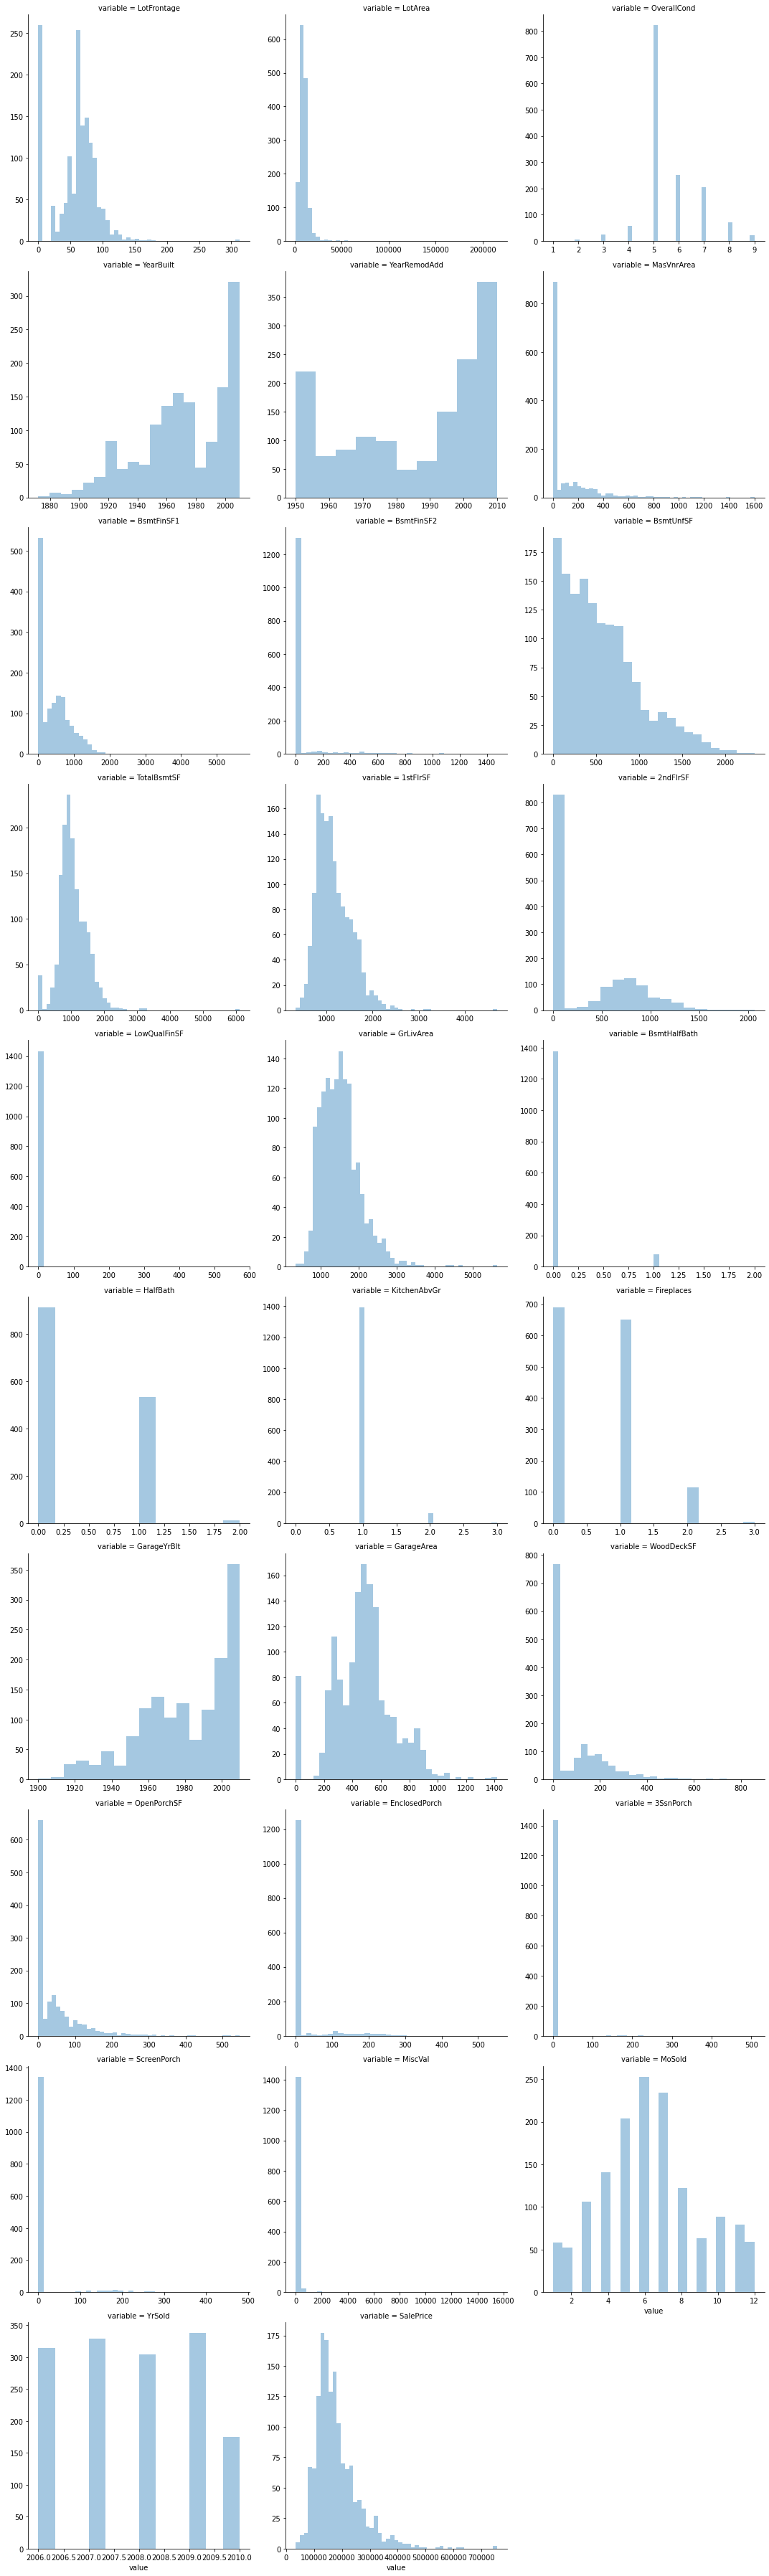

In [232]:
# distplot fonksiyonu tanimlandi
# kde parametresi False olarak tanimlandi
def distplot(x, **kwargs):
    sns.distplot(x, kde=False)

# melt metodu belli bir sutunu(hedef degisken olabilir bu) id degiskeni yapar(id_vars),
# burada id_vars tanimlanmadigindan df deki id olarak kaldi
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
f = pd.melt(house_prices_clean, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(sns.distplot, "value", kde=False )


## ***Cok degiskenli analiz***

***Surekli-Kategorik degisken analizi***
- Hedef degiskenimiz satis fiyati (sale price)
- Hedef degiskenle (surekli), kategorik degiskenlerimizi bar grafigi ile analiz edebiliriz.

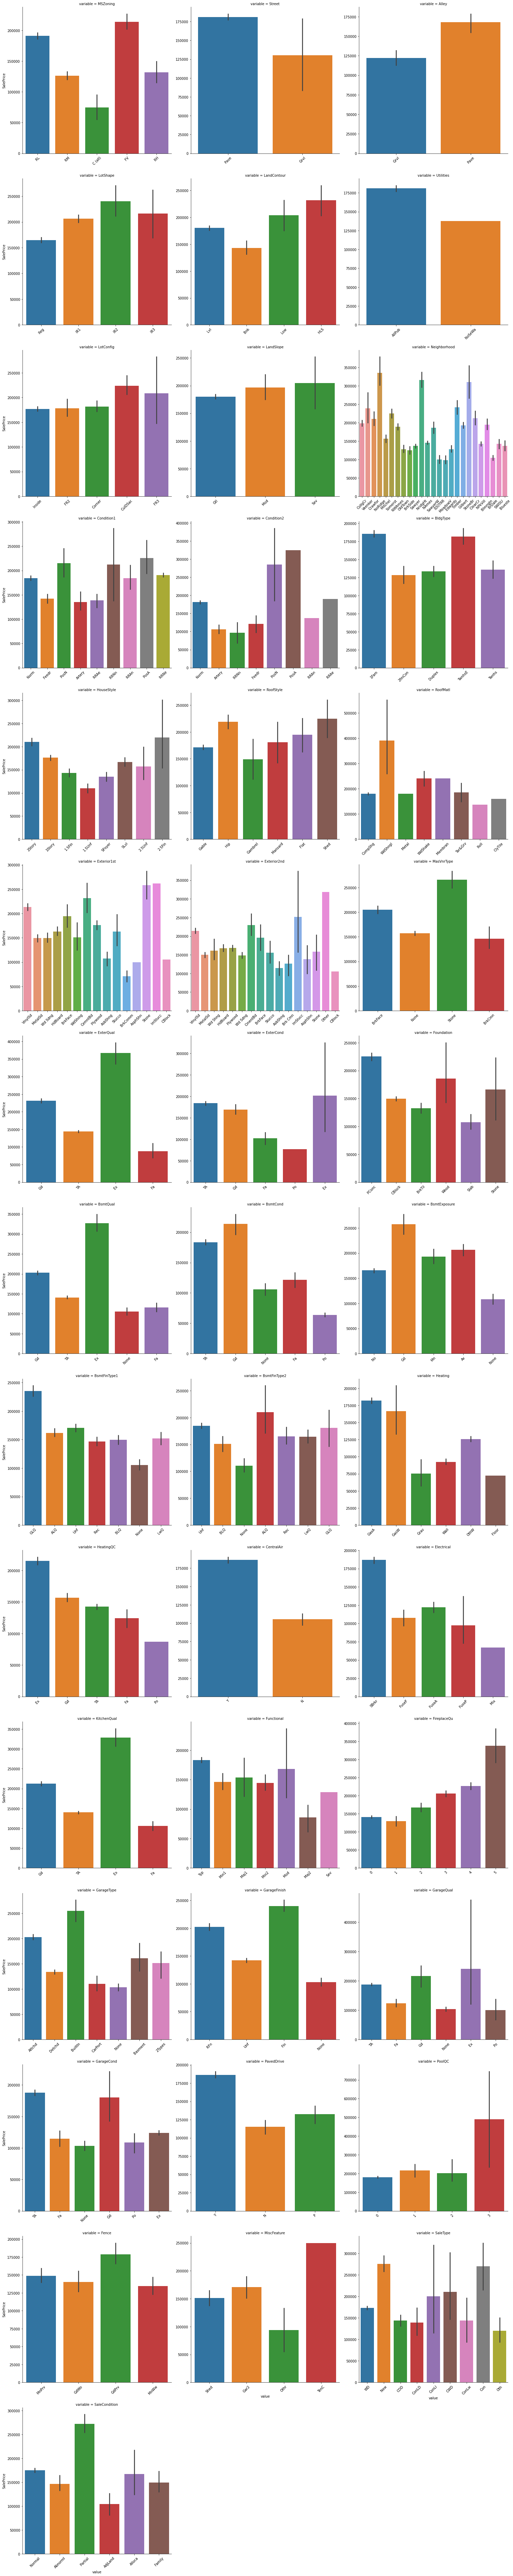

In [234]:
# barplot fonksiyonu tanimlandi
# fonksiyon icnide xticks rotasyon uygulandi 
def barplot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=45)

# melt metodu belli bir sutunu(hedef degisken olabilir bu) id degiskeni yapar(id_vars),
# diger sutun(lari) satirlara alt alta ekler(value_vars) ve yeni bir dataframe olusturur
# boylece hedef degiskenin diger degiskenlerle iliskisini ortaya cikarabiliriz
f = pd.melt(house_prices_clean, id_vars=['SalePrice'], value_vars=qualitative)
f
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=7)
g = g.map(barplot, "value", "SalePrice")

***Korelasyon***

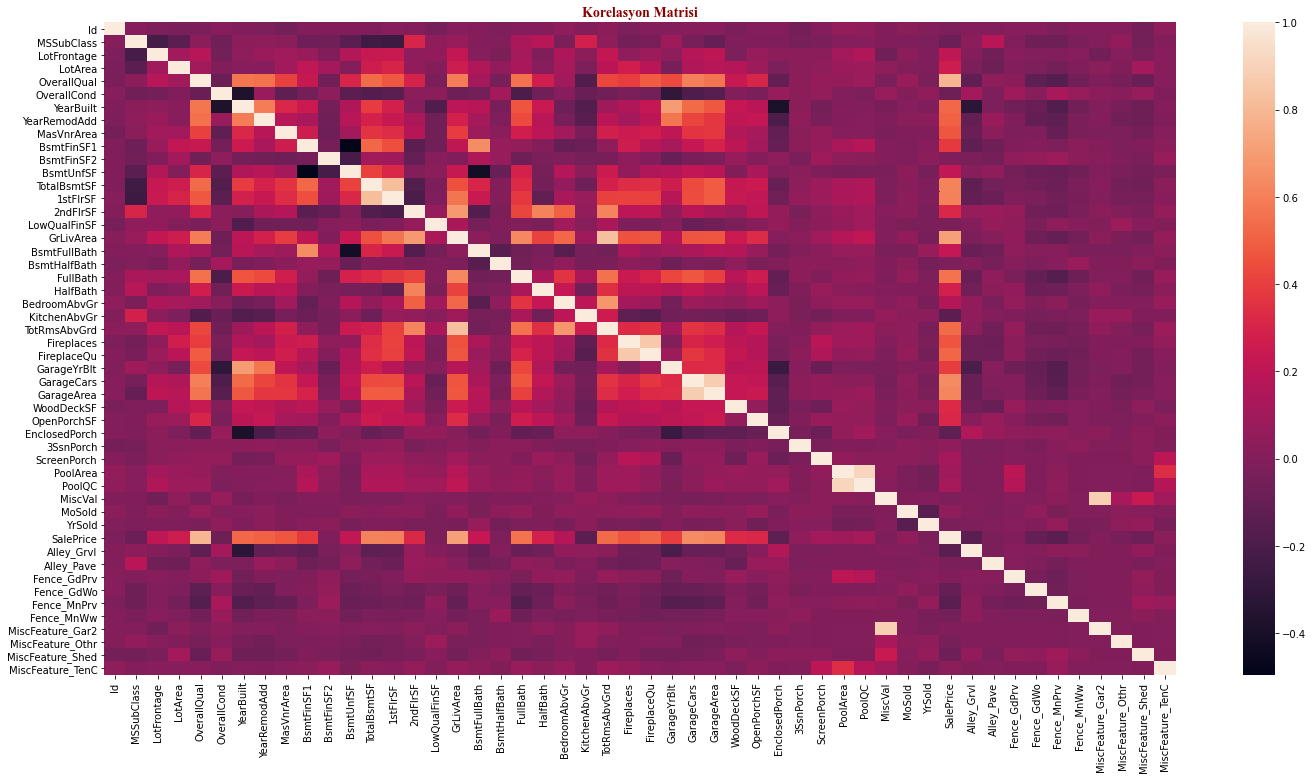

In [235]:
corr_matrix = house_prices_clean.corr()

plt.figure(figsize=(24,12))
sns.heatmap(corr_matrix)
plt.title("Korelasyon Matrisi", fontdict=title_font)

plt.show()



In [236]:
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,Alley_Grvl,Alley_Pave,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
Id,1.000,0.011,-0.020,-0.033,-0.028,0.013,-0.013,-0.022,-0.051,-0.005,-0.006,-0.008,-0.015,0.010,0.006,-0.044,0.008,0.002,-0.020,0.006,0.007,0.038,0.003,0.027,-0.020,0.002,-0.003,0.017,0.018,-0.030,-0.000,0.003,-0.047,0.001,0.057,0.043,-0.006,0.021,0.001,-0.022,0.002,-0.002,0.011,0.009,-0.022,0.003,0.005,0.005,-0.048,0.041
MSSubClass,0.011,1.000,-0.215,-0.140,0.033,-0.059,0.028,0.041,0.024,-0.070,-0.066,-0.141,-0.239,-0.252,0.308,0.046,0.075,0.003,-0.002,0.132,0.177,-0.023,0.282,0.040,-0.046,-0.039,0.099,-0.040,-0.099,-0.013,-0.006,-0.012,-0.044,-0.026,0.008,0.014,-0.008,-0.014,-0.021,-0.084,0.031,0.185,0.001,-0.078,-0.076,-0.032,-0.002,0.051,-0.054,0.002
LotFrontage,-0.020,-0.215,1.000,0.101,0.177,-0.053,0.037,0.079,0.105,0.077,-0.009,0.161,0.238,0.245,0.043,0.050,0.220,0.011,-0.028,0.121,-0.013,0.144,0.034,0.221,0.044,0.084,0.038,0.165,0.201,-0.017,0.070,0.027,0.023,0.023,0.114,0.151,-0.060,0.019,-0.012,0.210,0.002,-0.065,0.014,-0.002,-0.001,0.014,-0.062,0.008,-0.028,0.017
LotArea,-0.033,-0.140,0.101,1.000,0.106,-0.006,0.014,0.014,0.103,0.214,0.111,-0.003,0.261,0.299,0.051,0.005,0.263,0.158,0.048,0.126,0.014,0.120,-0.018,0.190,0.271,0.185,-0.042,0.155,0.180,0.172,0.085,-0.018,0.020,0.043,0.078,0.088,0.038,0.001,-0.014,0.264,-0.030,-0.078,0.000,-0.017,-0.046,-0.011,0.020,-0.006,0.109,0.016
OverallQual,-0.028,0.033,0.177,0.106,1.000,-0.092,0.572,0.551,0.407,0.240,-0.059,0.308,0.538,0.476,0.295,-0.030,0.593,0.111,-0.040,0.551,0.273,0.102,-0.184,0.427,0.397,0.491,0.438,0.601,0.562,0.239,0.309,-0.114,0.030,0.065,0.065,0.086,-0.031,0.071,-0.027,0.791,-0.125,0.039,0.031,-0.132,-0.164,-0.058,-0.016,-0.043,-0.090,0.017
OverallCond,0.013,-0.059,-0.053,-0.006,-0.092,1.000,-0.376,0.074,-0.126,-0.046,0.040,-0.137,-0.171,-0.144,0.029,0.025,-0.080,-0.055,0.118,-0.194,-0.061,0.013,-0.087,-0.058,-0.024,-0.057,-0.299,-0.186,-0.152,-0.003,-0.033,0.070,0.026,0.055,-0.002,-0.017,0.069,-0.004,0.044,-0.078,0.116,-0.021,0.094,0.016,0.127,0.076,0.031,0.014,0.071,-0.014
YearBuilt,-0.013,0.028,0.037,0.014,0.572,-0.376,1.000,0.593,0.312,0.250,-0.049,0.149,0.391,0.282,0.010,-0.184,0.199,0.188,-0.038,0.468,0.243,-0.071,-0.175,0.096,0.148,0.225,0.700,0.538,0.479,0.225,0.189,-0.387,0.031,-0.050,0.005,-0.000,-0.034,0.012,-0.014,0.523,-0.321,-0.017,-0.069,-0.087,-0.176,-0.062,-0.003,-0.039,-0.075,0.006
YearRemodAdd,-0.022,0.041,0.079,0.014,0.551,0.074,0.593,1.000,0.177,0.128,-0.068,0.181,0.291,0.240,0.140,-0.062,0.287,0.119,-0.012,0.439,0.183,-0.041,-0.150,0.192,0.113,0.196,0.571,0.421,0.372,0.206,0.226,-0.194,0.045,-0.039,0.006,0.011,-0.010,0.021,0.036,0.507,-0.113,0.073,-0.007,-0.113,-0.129,-0.024,0.005,-0.063,-0.078,-0.009
MasVnrArea,-0.051,0.024,0.105,0.103,0.407,-0.126,0.312,0.177,1.000,0.261,-0.071,0.114,0.360,0.340,0.174,-0.069,0.388,0.083,0.027,0.273,0.199,0.103,-0.038,0.280,0.247,0.275,0.209,0.362,0.371,0.160,0.123,-0.110,0.019,0.062,0.012,0.011,-0.030,-0.007,-0.008,0.473,-0.089,0.025,-0.017,-0.015,-0.103,-0.026,-0.021,-0.021,-0.046,0.012
BsmtFinSF1,-0.005,-0.070,0.077,0.214,0.240,-0.046,0.250,0.128,0.261,1.000,-0.050,-0.495,0.522,0.446,-0.137,-0.065,0.208,0.649,0.067,0.059,0.004,-0.107,-0.081,0.044,0.260,0.180,0.119,0.224,0.297,0.204,0.112,-0.102,0.026,0.062,0.140,0.173,0.004,-0.016,0.014,0.386,-0.124,-0.078,-0.006,0.002,-0.021,0.023,0.004,-0.021,-0.010,0.020


In [168]:
sale_corr = corr_matrix['SalePrice'].sort_values()
sale_corr.drop('SalePrice', inplace= True)

In [237]:
sale_corr

Fence_MnPrv        -0.141
Alley_Grvl         -0.139
KitchenAbvGr       -0.136
EnclosedPorch      -0.129
Fence_GdWo         -0.100
MSSubClass         -0.084
OverallCond        -0.078
MiscFeature_Shed   -0.070
Fence_MnWw         -0.051
MiscFeature_Othr   -0.041
YrSold             -0.029
Alley_Pave         -0.028
LowQualFinSF       -0.026
Id                 -0.022
MiscVal            -0.021
BsmtHalfBath       -0.017
BsmtFinSF2         -0.011
Fence_GdPrv        -0.005
MiscFeature_Gar2   -0.005
MiscFeature_TenC    0.023
3SsnPorch           0.045
MoSold              0.046
PoolArea            0.092
ScreenPorch         0.111
PoolQC              0.120
BedroomAbvGr        0.168
BsmtUnfSF           0.214
BsmtFullBath        0.227
LotArea             0.264
HalfBath            0.284
OpenPorchSF         0.316
2ndFlrSF            0.319
WoodDeckSF          0.324
LotFrontage         0.352
BsmtFinSF1          0.386
Fireplaces          0.467
MasVnrArea          0.477
GarageYrBlt         0.486
YearRemodAdd

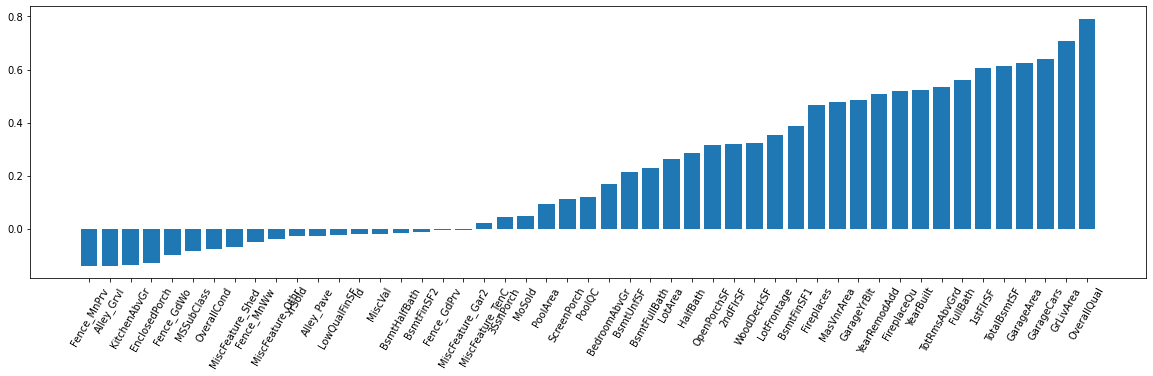

In [243]:
sale_corr
plt.figure(figsize=(20,5))
plt.bar(x=sale_corr.index, height=sale_corr)
plt.xticks(rotation=60)
plt.show()